# Project 3: Smart Beta Portfolio and Portfolio Optimization

## Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from matplotlib import colors
import seaborn as sns

## Overview

Smart beta has a broad meaning, but we can say in practice that when we use the universe of stocks from an index, and then apply some weighting scheme other than market cap weighting, it can be considered a type of smart beta fund. A Smart Beta portfolio generally gives investors exposure or "beta" to one or more types of market characteristics (or factors) that are believed to predict prices while giving investors a diversified broad exposure to a particular market. Smart Beta portfolios generally target momentum, earnings quality, low volatility, and dividends or some combination. Smart Beta Portfolios are generally rebalanced infrequently and follow relatively simple rules or algorithms that are passively managed. Model changes to these types of funds are also rare requiring prospectus filings with US Security and Exchange Commission in the case of US focused mutual funds or ETFs.. Smart Beta portfolios are generally long-only, they do not short stocks.

In contrast, a purely alpha-focused quantitative fund may use multiple models or algorithms to create a portfolio. The portfolio manager retains discretion in upgrading or changing the types of models and how often to rebalance the portfolio in attempt to maximize performance in comparison to a stock benchmark. Managers may have discretion to short stocks in portfolios.

Imagine you're a portfolio manager, and wish to try out some different portfolio weighting methods.

One way to design portfolio is to look at certain accounting measures (fundamentals) that, based on past trends, indicate stocks that produce better results.

For instance, you may start with a hypothesis that dividend-issuing stocks tend to perform better than stocks that do not. This may not always be true of all companies; for instance, Apple does not issue dividends, but has had good historical performance. The hypothesis about dividend-paying stocks may go something like this:

Companies that regularly issue dividends may also be more prudent in allocating their available cash, and may indicate that they are more conscious of prioritizing shareholder interests. For example, a CEO may decide to reinvest cash into pet projects that produce low returns. Or, the CEO may do some analysis, identify that reinvesting within the company produces lower returns compared to a diversified portfolio, and so decide that shareholders would be better served if they were given the cash (in the form of dividends). So according to this hypothesis, dividends may be both a proxy for how the company is doing (in terms of earnings and cash flow), but also a signal that the company acts in the best interest of its shareholders. Of course, it's important to test whether this works in practice.

You may also have another hypothesis, with which you wish to design a portfolio that can then be made into an ETF. You may find that investors may wish to invest in passive beta funds, but wish to have less risk exposure (less volatility) in their investments. The goal of having a low volatility fund that still produces returns similar to an index may be appealing to investors who have a shorter investment time horizon, and so are more risk averse.

So the objective of your proposed portfolio is to design a portfolio that closely tracks an index, while also minimizing the portfolio variance. Also, if this portfolio can match the returns of the index with less volatility, then it has a higher risk-adjusted return (same return, lower volatility).

Smart Beta ETFs can be designed with both of these two general methods (among others): alternative weighting and minimum volatility ETF.

## Loading the Data

For this universe of stocks, we'll be selecting large dollar volume stocks. We're using this universe, since it is highly liquid.

Since, I am technically not allowed to use or download this data I think it better if I protect the refrences of where I got it from. I have saved all the links in a my_secrets.py file. We'll simply import the link from there.

In [2]:
from my_secrets import DATA_URL3

In [3]:
stock_data = pd.read_csv(DATA_URL3)
stock_data.head()

,Unnamed: 0,date,ticker,adj_close,adj_volume,dividends
0,0,2013-07-01,A,29.994186,4283600.0,0.0
1,1,2013-07-02,A,29.650137,2986500.0,0.0
2,2,2013-07-03,A,29.705185,1940600.0,0.0
3,3,2013-07-05,A,30.434568,2097800.0,0.0
4,4,2013-07-08,A,30.524021,2570100.0,0.0


We start by loading our data and then we'll create a function `large_dollar_volume_stocks` to select our universe of stocks.

In [4]:
def large_dollar_volume_stocks(df, price_column, volume_column, top_percent):
    """
    Get the stocks with the largest dollar volume stocks.
    Parameters
    ----------
    df : DataFrame
        Stock prices with dates and ticker symbols
    price_column : str
        The column with the price data in `df`
    volume_column : str
        The column with the volume in `df`
    top_percent : float
        The top x percent to consider largest in the stock universe
    Returns
    -------
    large_dollar_volume_stocks_symbols : List of str
        List of of large dollar volume stock symbols
    """
    dollar_traded = df.groupby('ticker').apply(lambda row: sum(row[volume_column] * row[price_column]))

    return dollar_traded.sort_values().tail(int(len(dollar_traded) * top_percent)).index.values.tolist()

Now we can call this function.

In [5]:
df = stock_data.copy()

percent_top_dollar = 0.2
high_volume_symbols = large_dollar_volume_stocks(df, 'adj_close', 'adj_volume', percent_top_dollar)
df = df[df['ticker'].isin(high_volume_symbols)]

close = df.reset_index().pivot(index='date', columns='ticker', values='adj_close')
volume = df.reset_index().pivot(index='date', columns='ticker', values='adj_volume')
dividends = df.reset_index().pivot(index='date', columns='ticker', values='dividends')

In [6]:
close.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,16.176093,53.109173,34.924478,31.425388,122.627520,41.553397,13.632976,86.803334,282.10,82.909477,...,32.320046,84.381102,44.660080,29.284276,40.072721,41.021920,35.915105,65.489398,112.188800,76.320802
2013-07-02,15.819834,54.312247,35.428076,31.272881,121.053618,41.369084,13.637577,85.530087,283.73,82.890372,...,32.311145,83.543882,44.664902,28.677215,40.287567,41.132940,35.793536,65.594757,110.197593,76.608168
2013-07-03,16.127950,54.612043,35.444862,30.725650,121.210030,40.751635,13.803215,85.307492,284.03,83.043218,...,32.355650,84.372195,45.098917,28.805467,40.589942,40.818383,35.793536,65.638657,110.162660,76.650427
2013-07-05,16.214608,54.173381,35.856134,31.326707,123.536668,41.645554,14.005662,86.936891,285.88,84.428386,...,32.720597,85.975383,46.003113,28.942269,40.820703,40.938655,36.531636,66.033753,110.983596,77.394196
2013-07-08,16.310894,53.865799,36.661889,31.766285,123.653978,41.949671,13.932045,87.417697,290.59,84.351963,...,32.978730,86.376180,45.354503,29.523680,41.127057,41.937835,37.191585,67.350740,110.896263,77.968926


In [7]:
volume.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,12511796.0,97763400.0,4588200.0,6346900.0,1406200.0,12675600.0,8993800.0,4898700.0,2888200.0,2780300.0,...,8606900.0,3889500.0,11616000.0,7721400.0,9746200.0,6262400.0,16177100.0,6697700.0,1082600.0,13182200.0
2013-07-02,10748794.0,117466300.0,4365900.0,5793200.0,1030500.0,17234200.0,9789100.0,4006100.0,3238200.0,2410000.0,...,10381200.0,3696000.0,8749200.0,8694600.0,9660800.0,7193000.0,15558700.0,6726400.0,1674400.0,12320700.0
2013-07-03,7039678.0,60232200.0,2417500.0,8381100.0,699300.0,7433200.0,5556600.0,2132600.0,1373000.0,1460900.0,...,3947400.0,1737000.0,4533200.0,8154900.0,5965700.0,4391800.0,8074400.0,2316400.0,599500.0,5674000.0
2013-07-05,6426810.0,68506200.0,2743700.0,4664300.0,764200.0,9687000.0,8382900.0,2233500.0,1985400.0,1583700.0,...,7525300.0,2655900.0,8495600.0,6230200.0,8024400.0,4493200.0,14933800.0,5443900.0,623100.0,8917900.0
2013-07-08,7161394.0,74534600.0,3978300.0,7545600.0,884300.0,9459900.0,10152800.0,2464300.0,3046700.0,2410900.0,...,8869200.0,2893000.0,19588000.0,7292800.0,7234600.0,6831100.0,22830100.0,6713400.0,1457100.0,12086700.0


In [8]:
dividends.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2013-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2013-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2013-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
2013-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.515,0.0,0.0,0.0,0.0,0.0


Now let's see how the prices look on a graph. We'll create a function for plotting the prices and then call it.

In [9]:
def plot_prices(close_prices, column_name, colour_name = ['c', 'g', 'r', 'm', 'b', 'y', 'k']):
    
    # for this function to work input column_name of length<=7 or also input a colour_name list of equal length
    assert len(column_name)<=len(colour_name)
    
    # Creating the figure
    fig, ax = plt.subplots(1, 1, 
                            figsize =(13, 5),
                            tight_layout = True)
    
    # Remove axes spines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
        
    # Remove x, y ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Add x, y gridlines
    ax.grid(visible = True, color ='grey',
             linestyle ='-.', linewidth = 0.5,
             alpha = 0.6)
    
    # Adding extra features    
    ax.set_ylabel("Close Prices")
    
    # Potting the graphs
    for index, column in enumerate(column_name):
        plt.plot(pd.DatetimeIndex(close_prices.index), close_prices[column], linewidth=2, 
                                                                          color=colour_name[index], label=column)
    
    # Adding legend
    plt.legend(loc="upper left")


Now let's see how they look. We'll plot the first three tickers.

<function matplotlib.pyplot.show(close=None, block=None)>

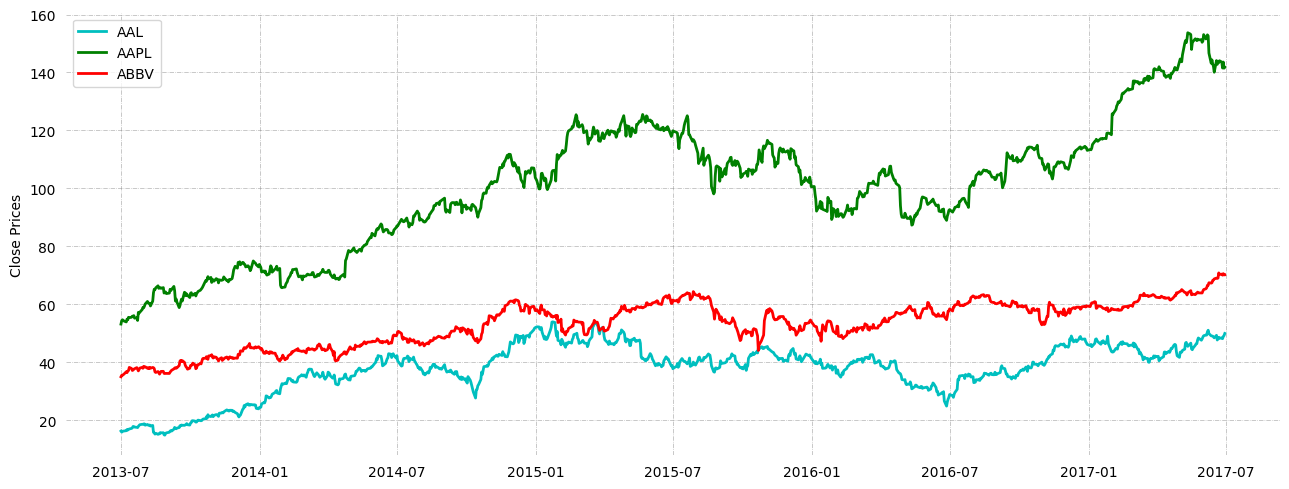

In [10]:
ticker_number = 3
plot_prices(close, close.columns[:ticker_number])
plt.show

## Part 1: Smart Beta Portfolio

In Part 1 of this project, you'll build a portfolio using dividend yield to choose the portfolio weights. A portfolio such as this could be incorporated into a smart beta ETF. You'll compare this portfolio to a market cap weighted index to see how well it performs.

Note that in practice, you'll probably get the index weights from a data vendor (such as companies that create indices, like MSCI, FTSE, Standard and Poor's), but for this exercise we will simulate a market cap weighted index.

### Index Weights

The index we'll be using is based on large dollar volume stocks. Implement `generate_dollar_volume_weights` to generate the weights for this index. For each date, generate the weights based on dollar volume traded for that date. For example, assume the following is close prices and volume data:
<br>![index](index_weight.png)
<br> The weights created from the function `generate_dollar_volume_weights` should be the following:
<br>![index1](index_weight1.png)

In [11]:
def generate_dollar_volume_weights(close, volume):
    """
    Generate dollar volume weights.

    Parameters
    ----------
    close : DataFrame
        Close price for each ticker and date
    volume : str
        Volume for each ticker and date

    Returns
    -------
    dollar_volume_weights : DataFrame
        The dollar volume weights for each ticker and date
    """
    assert close.index.equals(volume.index) # assert raises an assertion error if the assertion is False
    assert close.columns.equals(volume.columns) # .equals() is used instead of '==' because np.NaN==np.NaN returns false
    # while .equals() considers NaN values to be equal
    
    dollar_volume = close * volume
    return dollar_volume.divide(dollar_volume.sum(axis=1), axis=0)


In [12]:
index_weights = generate_dollar_volume_weights(close, volume)
index_weights.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.004587,0.117672,0.003632,0.004520,0.003908,0.011937,0.002779,0.009637,0.018465,0.005224,...,0.006304,0.007438,0.011757,0.005125,0.008851,0.005822,0.013168,0.009941,0.002753,0.022801
2013-07-02,0.003636,0.136400,0.003307,0.003873,0.002667,0.015243,0.002854,0.007326,0.019643,0.004271,...,0.007171,0.006602,0.008355,0.005331,0.008321,0.006326,0.011906,0.009433,0.003945,0.020180
2013-07-03,0.004669,0.135261,0.003524,0.010589,0.003485,0.012456,0.003154,0.007481,0.016036,0.004989,...,0.005252,0.006026,0.008407,0.009659,0.009957,0.007371,0.011884,0.006252,0.002716,0.017884
2013-07-05,0.003193,0.113709,0.003014,0.004477,0.002893,0.012361,0.003597,0.005949,0.017390,0.004097,...,0.007544,0.006996,0.011975,0.005525,0.010036,0.005636,0.016716,0.011014,0.002119,0.021147
2013-07-08,0.002678,0.092038,0.003344,0.005495,0.002507,0.009097,0.003243,0.004938,0.020296,0.004662,...,0.006705,0.005728,0.020366,0.004936,0.006821,0.006567,0.019465,0.010365,0.003704,0.021603


Let us check if we have weighted everything rightly. Each row should sum to one if everything is working fine. Let's see!

In [13]:
index_weights.sum(axis=1)

date
2013-07-01    1.0
2013-07-02    1.0
2013-07-03    1.0
2013-07-05    1.0
2013-07-08    1.0
             ... 
2017-06-26    1.0
2017-06-27    1.0
2017-06-28    1.0
2017-06-29    1.0
2017-06-30    1.0
Length: 1009, dtype: float64

Well! Everything looks fine! Let's perform another check:

In [14]:
index_weights.sum(axis=1)==1.0

date
2013-07-01    False
2013-07-02     True
2013-07-03    False
2013-07-05     True
2013-07-08    False
              ...  
2017-06-26    False
2017-06-27     True
2017-06-28    False
2017-06-29    False
2017-06-30    False
Length: 1009, dtype: bool

OOPS! What is that? Hmm let's call the first element of the sum series.

In [15]:
test = index_weights.sum(axis=1)
test[0]

1.0000000000000002

Okay! I get it now. Here, we have come across some floating point errors. Since the errors are realtively small we'll ignore them for now!

### View Data

Now let's view how the weights look using a heat map. For the heatmaps we will be using seaborn. Although, matplotlib classic would have sufficed for this, however, I thought it better to familiarise myself with another commonly used package.

Other than fiddling with the colour schemes for better visibilty, I have tried to bring the plots as close as possible to the plots produced by the Udacity `project-helper` functions. Although, this won't be interactive as plotly, this is a pretty close rendition for now.

In [16]:
def plot_heatmap(data, vmin=0.0, vmax=0.2, cmap="rocket_r"):
    fig, ax = plt.subplots(figsize=(13,7))
    sns.heatmap(data.T, vmin=vmin, vmax=vmax, cmap=cmap, xticklabels=252, ax=ax)

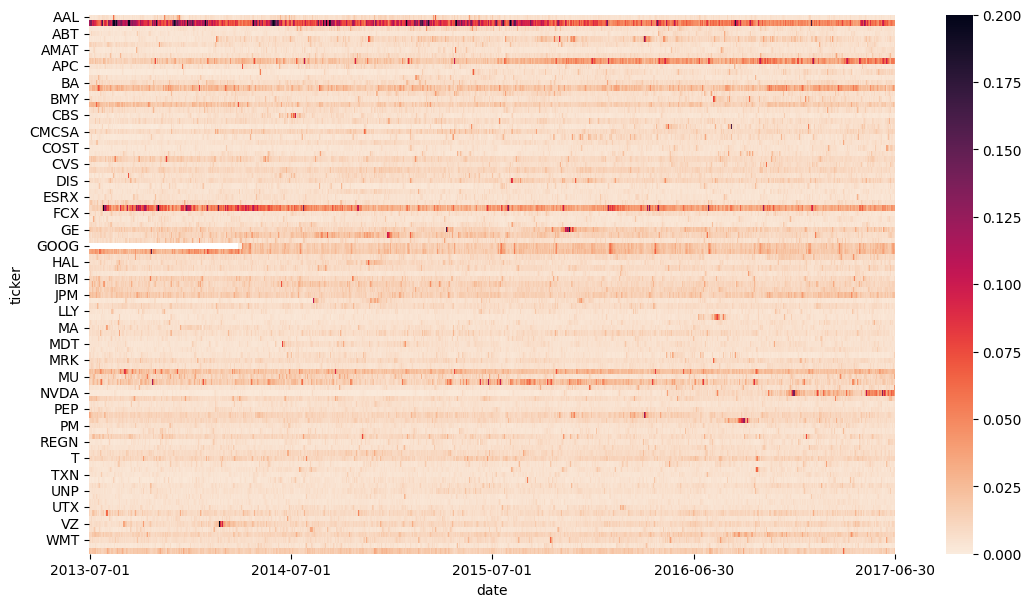

In [17]:
plot_heatmap(index_weights)

### Portfolio Weights

Now that we have the index weights, let's choose the portfolio weights based on dividend. You would normally calculate the weights based on trailing dividend yield, but we'll simplify this by just calculating the total dividend yield over time.

Implement `calculate_dividend_weights` to return the weights for each stock based on its total dividend yield over time. This is similar to generating the weight for the index, but it's using dividend data instead. For example, assume the following is `dividends` data:

<br>![ETF](ETF_weight.png)

<br> The weights created from the function `calculate_dividend_weights` should be the following:

<br> ![ETF1](ETF_weight1.png)

In [18]:
def calculate_dividend_weights(dividends):
    """
    Calculate dividend weights.

    Parameters
    ----------
    dividends : DataFrame
        Dividend for each stock and date

    Returns
    -------
    dividend_weights : DataFrame
        Weights for each stock and date
    """
    cumulative_dividend_yields = dividends.cumsum()
    return cumulative_dividend_yields.divide(cumulative_dividend_yields.sum(axis=1), axis=0)


In [19]:
etf_weights = calculate_dividend_weights(dividends)
etf_weights.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2013-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2013-07-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2013-07-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2013-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.069997,0.0,0.0,0.0,0.0,0.0


And we'll check if the sum of each row is one.

In [20]:
etf_weights.sum(axis=1)

date
2013-07-01    1.0
2013-07-02    1.0
2013-07-03    1.0
2013-07-05    1.0
2013-07-08    1.0
             ... 
2017-06-26    1.0
2017-06-27    1.0
2017-06-28    1.0
2017-06-29    1.0
2017-06-30    1.0
Length: 1009, dtype: float64

So that should do it. Now we can plot this as a heat map.

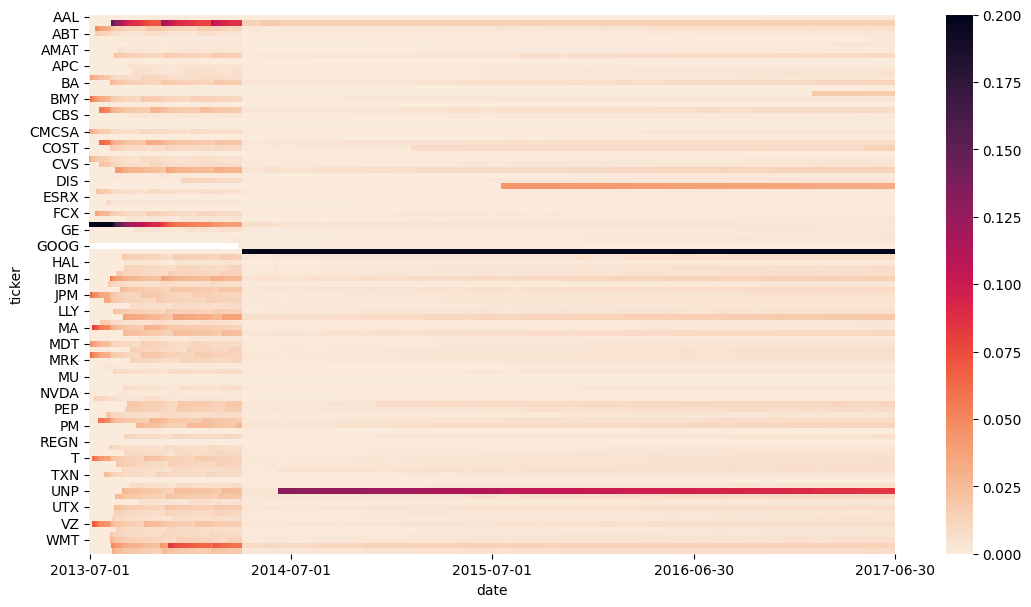

In [21]:
plot_heatmap(etf_weights)

### Returns

Implement `generate_returns` to generate returns data for all the stocks and dates from price data. You might notice we're implementing returns and not log returns. Since we're not dealing with volatility, we don't have to use log returns.

In [22]:
def generate_returns(prices):
    """
    Generate returns for ticker and date.

    Parameters
    ----------
    prices : DataFrame
        Price for each ticker and date

    Returns
    -------
    returns : Dataframe
        The returns for each ticker and date
    """
    return prices/prices.shift(1) - 1


In [23]:
returns = generate_returns(close)
returns.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,-0.022024,0.022653,0.014420,-0.004853,-0.012835,-0.004436,0.000337,-0.014668,0.005778,-0.000230,...,-0.000275,-0.009922,0.000108,-0.020730,0.005361,0.002706,-0.003385,0.001609,-0.017749,0.003765
2013-07-03,0.019477,0.005520,0.000474,-0.017499,0.001292,-0.014925,0.012146,-0.002603,0.001057,0.001844,...,0.001377,0.009915,0.009717,0.004472,0.007505,-0.007647,0.000000,0.000669,-0.000317,0.000552
2013-07-05,0.005373,-0.008032,0.011603,0.019562,0.019195,0.021936,0.014667,0.019100,0.006513,0.016680,...,0.011279,0.019001,0.020049,0.004749,0.005685,0.002947,0.020621,0.006019,0.007452,0.009703
2013-07-08,0.005938,-0.005678,0.022472,0.014032,0.000950,0.007303,-0.005256,0.005531,0.016475,-0.000905,...,0.007889,0.004662,-0.014099,0.020089,0.007505,0.024407,0.018065,0.019944,-0.000787,0.007426


Now we can proceed to plot this using a heatmap.

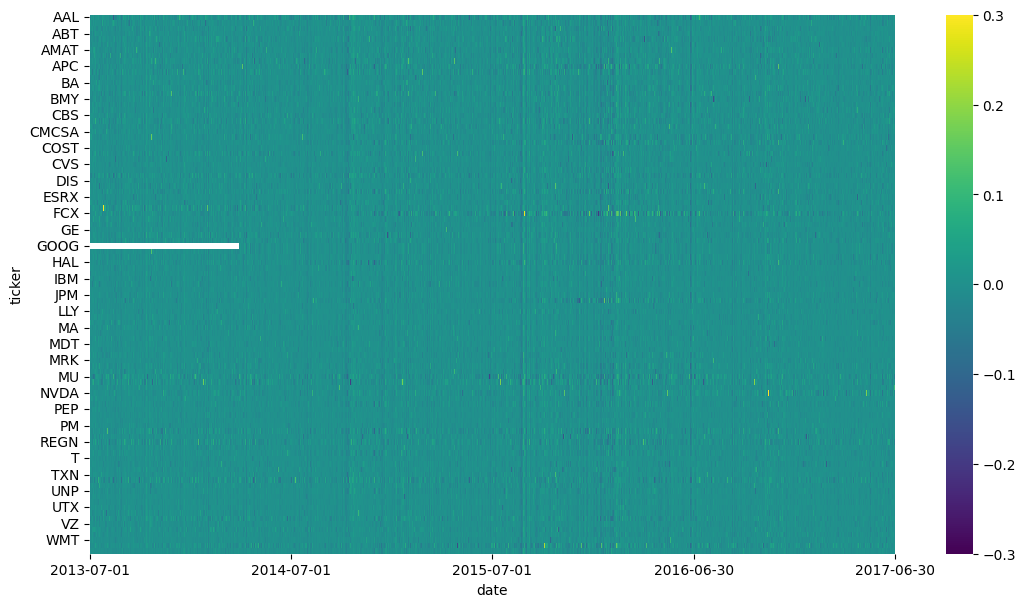

In [24]:
plot_heatmap(returns, vmin=-0.3, vmax=0.3, cmap="viridis")

### Weighted Returns

With the returns of each stock computed, we can use it to compute the returns for an index or ETF. Implement `generate_weighted_returns` to create weighted returns using the returns and weights.

In [25]:
def generate_weighted_returns(returns, weights):
    """
    Generate weighted returns.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    weights : DataFrame
        Weights for each ticker and date

    Returns
    -------
    weighted_returns : DataFrame
        Weighted returns for each ticker and date
    """
    assert returns.index.equals(weights.index)
    assert returns.columns.equals(weights.columns)

    return returns*weights

In [26]:
index_weighted_returns = generate_weighted_returns(returns, index_weights)
etf_weighted_returns = generate_weighted_returns(returns, etf_weights)
index_weighted_returns.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,-0.000080,0.003090,0.000048,-0.000019,-0.000034,-0.000068,9.632765e-07,-0.000107,0.000114,-9.842016e-07,...,-0.000002,-0.000066,9.021515e-07,-0.000111,0.000045,0.000017,-0.000040,0.000015,-7.001658e-05,0.000076
2013-07-03,0.000091,0.000747,0.000002,-0.000185,0.000005,-0.000186,3.830613e-05,-0.000019,0.000017,9.198767e-06,...,0.000007,0.000060,8.168894e-05,0.000043,0.000075,-0.000056,0.000000,0.000004,-8.608899e-07,0.000010
2013-07-05,0.000017,-0.000913,0.000035,0.000088,0.000056,0.000271,5.276059e-05,0.000114,0.000113,6.833449e-05,...,0.000085,0.000133,2.400813e-04,0.000026,0.000057,0.000017,0.000345,0.000066,1.578963e-05,0.000205
2013-07-08,0.000016,-0.000523,0.000075,0.000077,0.000002,0.000066,-1.704396e-05,0.000027,0.000334,-4.219927e-06,...,0.000053,0.000027,-2.871453e-04,0.000099,0.000051,0.000160,0.000352,0.000207,-2.914900e-06,0.000160


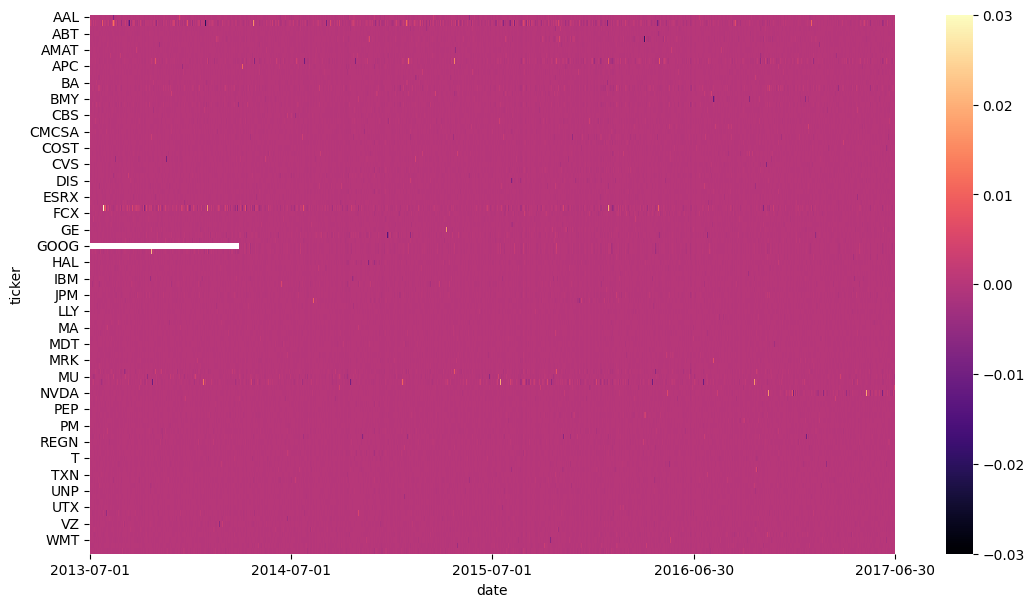

In [87]:
plot_heatmap(index_weighted_returns, vmin=-0.03, vmax=0.03, cmap="magma")

In [27]:
etf_weighted_returns.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-02,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,0.0,-0.0,0.000000,0.0,-0.0,0.0,-0.0,0.0
2013-07-03,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,-0.0,0.0,0.0,-0.0,0.0
2013-07-05,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2013-07-08,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,...,0.0,0.0,-0.0,0.0,0.000525,0.0,0.0,0.0,-0.0,0.0


Now we'll view these using a heatmap.

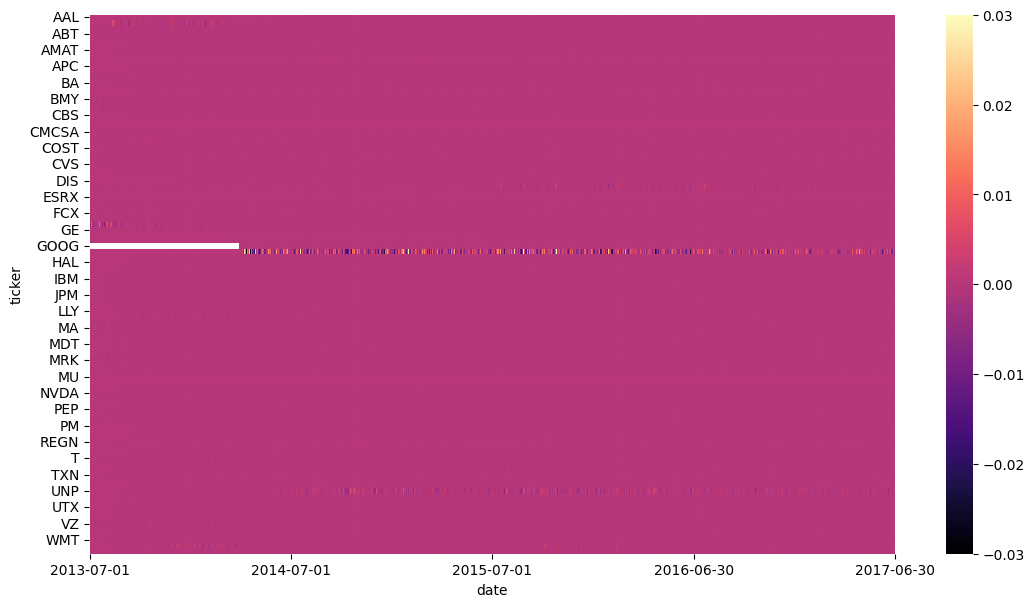

In [28]:
plot_heatmap(etf_weighted_returns, vmin=-0.03, vmax=0.03, cmap="magma")

### Cumulative Returns

To compare performance between the ETF and Index, we're going to calculate the tracking error. Before we do that, we first need to calculate the index and ETF comulative returns. Implement `calculate_cumulative_returns` to calculate the cumulative returns over time given the returns.

In [29]:
def calculate_cumulative_returns(returns):
    """
    Calculate cumulative returns.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date

    Returns
    -------
    cumulative_returns : Pandas Series
        Cumulative returns for each date
    """
    return (1 + returns.sum(axis=1)).cumprod()

In [30]:
index_weighted_cumulative_returns = calculate_cumulative_returns(index_weighted_returns)
etf_weighted_cumulative_returns = calculate_cumulative_returns(etf_weighted_returns)
index_weighted_cumulative_returns

date
2013-07-01    1.000000
2013-07-02    1.002729
2013-07-03    1.004780
2013-07-05    1.014176
2013-07-08    1.018668
                ...   
2017-06-26    2.778794
2017-06-27    2.744980
2017-06-28    2.780881
2017-06-29    2.757786
2017-06-30    2.762272
Length: 1009, dtype: float64

In [31]:
etf_weighted_cumulative_returns

date
2013-07-01    1.000000
2013-07-02    0.996859
2013-07-03    1.005813
2013-07-05    1.027155
2013-07-08    1.028802
                ...   
2017-06-26    1.872283
2017-06-27    1.844714
2017-06-28    1.864353
2017-06-29    1.836107
2017-06-30    1.833664
Length: 1009, dtype: float64

We can now move on to plotting the data. We'll create a function `plot_compare` to do the same which is a basic modification of the previous function `plot_prices`.

In [32]:
def plot_compare(index, etf, colour_name = ['c', 'g', 'b', 'r', 'm', 'y', 'k']):
    
    # Creating the figure
    fig, ax = plt.subplots(1, 1, 
                            figsize =(13, 5),
                            tight_layout = True)
    
    # Remove axes spines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)
        
    # Remove x, y ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Add x, y gridlines
    ax.grid(visible = True, color ='grey',
             linestyle ='-.', linewidth = 0.5,
             alpha = 0.6)
    
    # Adding extra features    
    ax.set_ylabel("Cumulative Returns")
    ax.set_title("Smart Beta ETF vs. Index")
    
    # Potting the graphs
    plt.plot(pd.DatetimeIndex(index.index), index.values, linewidth=2, color=colour_name[1], label='Index')
    plt.plot(pd.DatetimeIndex(etf.index), etf.values, linewidth=2, color=colour_name[0], label='ETF')
    # Adding legend
    plt.legend(loc="upper left")


Now we can view the plot.

<function matplotlib.pyplot.show(close=None, block=None)>

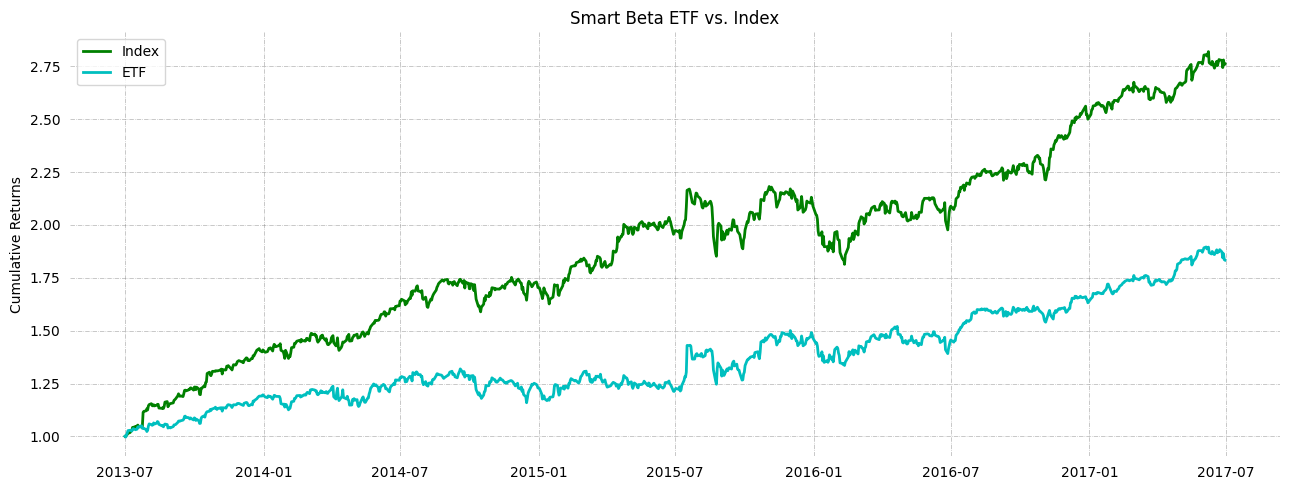

In [33]:
plot_compare(index_weighted_cumulative_returns, etf_weighted_cumulative_returns)
plt.show

### Tracking Error

In order to check the performance of the smart beta portfolio, we can calculate the annualized tracking error against the index. Implement `tracking_error` to return the tracking error between the ETF and benchmark.

For reference, we'll be using the following annualized tracking error function:
$$TE=\sqrt{252}\cdot\text{Sample Standard Deviation of }(r_{p}-r_{b})$$

Where $r_{p}$ is the portfolio/ETF returns and $r_{b}$ is the benchmark returns.

Note: When calculating the sample standard deviation, the delta degrees of freedom is 1, which is the also the default value.

In [34]:
def tracking_error(benchmark_returns_by_date, etf_returns_by_date):
    """
    Calculate the tracking error.

    Parameters
    ----------
    benchmark_returns_by_date : Pandas Series
        The benchmark returns for each date
    etf_returns_by_date : Pandas Series
        The ETF returns for each date

    Returns
    -------
    tracking_error : float
        The tracking error
    """
    assert benchmark_returns_by_date.index.equals(etf_returns_by_date.index)

    return np.sqrt(252)*np.std(etf_returns_by_date - benchmark_returns_by_date)

In [35]:
smart_beta_tracking_error = tracking_error(index_weighted_returns.sum(axis=1), etf_weighted_returns.sum(axis=1))
print('Smart Beta Tracking Error: {}'.format(smart_beta_tracking_error))

Smart Beta Tracking Error: 0.10197513267753261


## Part 2: Portfolio Optimization

Now, let's create a second portfolio. We'll still reuse the market cap weighted index, but this will be independent of the dividend-weighted portfolio that we created in part 1.

We want to both minimize the portfolio variance and also want to closely track a market cap weighted index. In other words, we're trying to minimize the distance between the weights of our portfolio and the weights of the index.

$$\text{Minimise}\Bigg[\sigma^{2}_{p}+\lambda\sqrt{\sum^{m}_{1}{({weight}_{i}-{indexweight}_{i})}^{2}}\Bigg]$$ <br> where, $m$ is the number of stocks in the portfolio, <br> and, $\lambda$ is a scaling factor that you can choose.

Why are we doing this? One way that investors evaluate a fund is by how well it tracks its index. The fund is still expected to deviate from the index within a certain range in order to improve fund performance. A way for a fund to track the performance of its benchmark is by keeping its asset weights similar to the weights of the index. We’d expect that if the fund has the same stocks as the benchmark, and also the same weights for each stock as the benchmark, the fund would yield about the same returns as the benchmark. By minimizing a linear combination of both the portfolio risk and distance between portfolio and benchmark weights, we attempt to balance the desire to minimize portfolio variance with the goal of tracking the index.

### Covariance

Implement `get_covariance_returns` to calculate the covariance of the returns. We'll use this to calculate the portfolio variance.

If we have $m$ stock series, the covariance matrix is an $m\times m$ matrix containing the covariance between each pair of stocks. We can use `Numpy.cov` to get the covariance. We give it a 2D array in which each row is a stock series, and each column is an observation at the same period of time. For any `NaN` values, you can replace them with zeros using the `DataFrame.fillna` function.
<br> The covariance matrix $P=\Bigg[\begin{matrix}\sigma_{1,1} & \text{...} & \sigma_{1,m} \\ \text{...} & \text{...} & \text{...} \\ \sigma_{m,1} & \text{...} & \sigma_{m,m} \end{matrix}\Bigg]$

In [36]:
def get_covariance_returns(returns):
    """
    Calculate covariance matrices.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date

    Returns
    -------
    returns_covariance  : 2 dimensional Ndarray
        The covariance of the returns
    """
    return np.cov(returns.T.fillna(0.0))

Next we will calculate the correlation of the covariance of the returns we have calculated.

In [37]:
covariance_returns = get_covariance_returns(returns)
covariance_returns = pd.DataFrame(covariance_returns, returns.columns, returns.columns)

covariance_returns_correlation = np.linalg.inv(np.diag(np.sqrt(np.diag(covariance_returns))))
covariance_returns_correlation = pd.DataFrame(
    covariance_returns_correlation.dot(covariance_returns).dot(covariance_returns_correlation),
    covariance_returns.index,
    covariance_returns.columns)
covariance_returns_correlation.head()

ticker,AAL,AAPL,ABBV,ABT,AGN,AIG,AMAT,AMGN,AMZN,APC,...,USB,UTX,V,VLO,VZ,WBA,WFC,WMT,WYNN,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAL,1.000000,0.213708,0.254844,0.312691,0.276696,0.326725,0.344918,0.322227,0.212470,0.157773,...,0.386823,0.352164,0.346633,0.263003,0.185649,0.286837,0.358606,0.184665,0.205254,0.163012
AAPL,0.213708,1.000000,0.204593,0.306641,0.219841,0.322727,0.359493,0.296799,0.294207,0.225890,...,0.360110,0.307629,0.318795,0.235848,0.232461,0.263712,0.299182,0.219114,0.208654,0.248395
ABBV,0.254844,0.204593,1.000000,0.449197,0.454011,0.353971,0.292382,0.524182,0.261327,0.192283,...,0.362642,0.311172,0.307102,0.269244,0.239339,0.318339,0.351416,0.191247,0.256258,0.292045
ABT,0.312691,0.306641,0.449197,1.000000,0.390637,0.458330,0.367100,0.511899,0.270373,0.255049,...,0.529601,0.466143,0.488132,0.341392,0.362349,0.392735,0.487646,0.325910,0.259440,0.365231
AGN,0.276696,0.219841,0.454011,0.390637,1.000000,0.343465,0.294242,0.488958,0.263433,0.171957,...,0.329825,0.292373,0.342419,0.290303,0.195880,0.350150,0.329306,0.142767,0.238234,0.217889


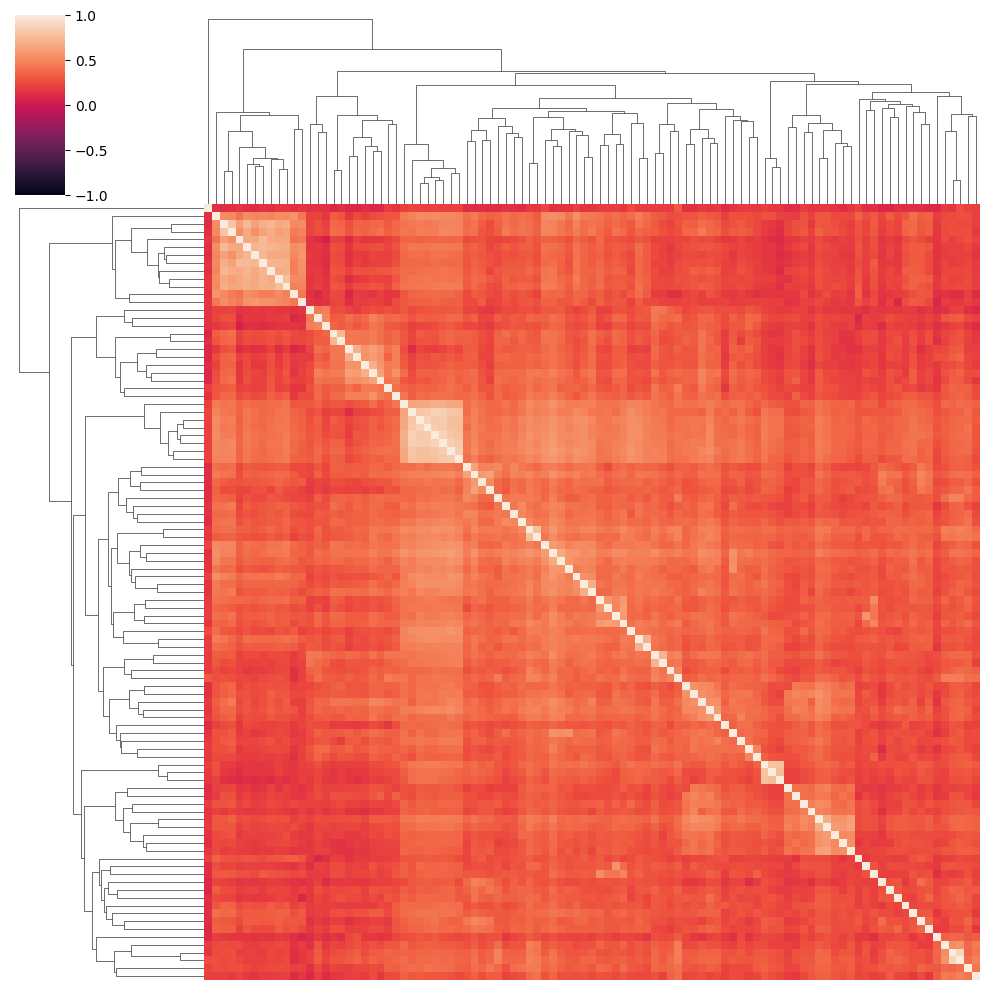

In [38]:
index = list(covariance_returns_correlation.columns)
plottable = pd.DataFrame(covariance_returns_correlation.values, index=index, columns=index)
sns.clustermap(plottable, vmin=-1, vmax=1, xticklabels=False, yticklabels=False)

#### portfolio variance

We can write the portfolio variance $\sigma^{2}_{p}=\textbf{x}^{T}\textbf{Px}$

Recall that the $\textbf{x}^{T}\textbf{Px}$ is called the quadratic form. We can use the cvxpy function `quad_form(x,P)` to get the quadratic form.

#### Distance from index weights

We want portfolio weights that track the index closely. So we want to minimize the distance between them. Recall from the Pythagorean theorem that you can get the distance between two points in an x,y plane by adding the square of the x and y distances and taking the square root. Extending this to any number of dimensions is called the L2 norm. So: $\sqrt{\sum^{m}_{1}{({weight}_{i}-{indexweight}_{i})}^{2}}$ can also be written as $\begin{Vmatrix}\textbf{x - index}\end{Vmatrix}_{2}$. There's a cvxpy function called norm() `norm(x, p=2, axis=None)`. The default is already set to find an L2 norm, so you would pass in one argument, which is the difference between your portfolio weights and the index weights.

#### objective function

We want to minimize both the portfolio variance and the distance of the portfolio weights from the index weights. We also want to choose a `scale` constant, which is  in the expression.

$\textbf{x}^{T}\textbf{Px}+\lambda \cdot \begin{Vmatrix}\text{x - index}\end{Vmatrix}_{2}$

This lets us choose how much priority we give to minimizing the difference from the index, relative to minimizing the variance of the portfolio. If you choose a higher value for `scale` $(\lambda)$.

We can find the objective function using cvxpy `objective = cvx.Minimize()`. Can you guess what to pass into this function?

#### constraints

We can also define our constraints in a list. For example, you'd want the weights to sum to one. So $\sum^{n}_{1}{x}=1$. You may also need to go long only, which means no shorting, so no negative weights. So $x_{i}>0$ for all $i$.  You could save a variable as `[x >= 0, sum(x) == 1]`, where x was created using `cvx.Variable()`.

#### optimization

So now that we have our objective function and constraints, we can solve for the values of $\textbf{x}$. cvxpy has the constructor `Problem(objective, constraints)`, which returns a `Problem` object.

The `Problem` object has a function solve(), which returns the minimum of the solution. In this case, this is the minimum variance of the portfolio.

It also updates the vector $\textbf{x}$.

We can check out the values of $x_{a}$ and $x_{b}$ that gave the minimum portfolio variance by using `x.value`

In [39]:
import cvxpy as cvx

def get_optimal_weights(covariance_returns, index_weights, scale=2.0):
    """
    Find the optimal weights.

    Parameters
    ----------
    covariance_returns : 2 dimensional Ndarray
        The covariance of the returns
    index_weights : Pandas Series
        Index weights for all tickers at a period in time
    scale : int
        The penalty factor for weights the deviate from the index 
    Returns
    -------
    x : 1 dimensional Ndarray
        The solution for x
    """
    assert len(covariance_returns.shape) == 2
    assert len(index_weights.shape) == 1
    assert covariance_returns.shape[0] == covariance_returns.shape[1]  == index_weights.shape[0]

    # creating the vector x:
    x = cvx.Variable(len(index_weights))
    
    # finding portfolio variance:
    portfolio_variance = cvx.quad_form(x, covariance_returns)
    
    # calculating distance from index weights:
    distance_from_index = cvx.norm((x-index_weights))
    
    # constructing the problem:
    objective = cvx.Minimize(portfolio_variance + scale*distance_from_index)
    constraints = [x>=0, sum(x) == 1]
    problem = cvx.Problem(objective, constraints)
    
    # solving the problem:
    problem.solve()
    
    return x.value

#### Optimized Portfolio

Using the `get_optimal_weights function`, let's generate the optimal ETF weights without rebalanceing. We can do this by feeding in the covariance of the entire history of data. We also need to feed in a set of index weights. We'll go with the average weights of the index over time.

In [40]:
raw_optimal_single_rebalance_etf_weights = get_optimal_weights(covariance_returns.values, index_weights.iloc[-1])
optimal_single_rebalance_etf_weights = pd.DataFrame(
    np.tile(raw_optimal_single_rebalance_etf_weights, (len(returns.index), 1)),
    returns.index,
    returns.columns)

With our ETF weights built, let's compare it to the index. Run the next cell to calculate the ETF returns and compare it to the index returns.

In [41]:
optim_etf_returns = generate_weighted_returns(returns, optimal_single_rebalance_etf_weights)
optim_etf_cumulative_returns = calculate_cumulative_returns(optim_etf_returns)
optim_etf_tracking_error = tracking_error(np.sum(index_weighted_returns, 1), np.sum(optim_etf_returns, 1))
print('Optimized ETF Tracking Error: {}'.format(optim_etf_tracking_error))

Optimized ETF Tracking Error: 0.05789276675131938


### Rebalance Portfolio Over Time

The single optimized ETF portfolio used the same weights for the entire history. This might not be the optimal weights for the entire period. Let's rebalance the portfolio over the same period instead of using the same weights. Implement `rebalance_portfolio` to rebalance a portfolio.

Reblance the portfolio every $n$ number of days, which is given as `shift_size`. When rebalancing, you should look back a certain number of days of data in the past, denoted as `chunk_size`. Using this data, compute the optimal weights using `get_optimal_weights` and `get_covariance_returns`.

In [42]:
def rebalance_portfolio(returns, index_weights, shift_size, chunk_size):
    """
    Get weights for each rebalancing of the portfolio.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    index_weights : DataFrame
        Index weight for each ticker and date
    shift_size : int
        The number of days between each rebalance
    chunk_size : int
        The number of days to look in the past for rebalancing

    Returns
    -------
    all_rebalance_weights  : list of Ndarrays
        The ETF weights for each point they are rebalanced
    """
    assert returns.index.equals(index_weights.index)
    assert returns.columns.equals(index_weights.columns)
    assert shift_size > 0
    assert chunk_size >= 0
    
    #TODO: Implement function
    all_rebalance_weights = []
    for n in range(chunk_size, len(returns), shift_size):
        returns_chunk = returns[(n-chunk_size):n]
        covariance_returns = get_covariance_returns(returns_chunk)
        optimal_weights = get_optimal_weights(covariance_returns, index_weights.iloc[n-1])
        all_rebalance_weights += [optimal_weights]
    
    return all_rebalance_weights


Run the following cell to rebalance the portfolio using `rebalance_portfolio`.

In [43]:
chunk_size = 250
shift_size = 5
all_rebalance_weights = rebalance_portfolio(returns, index_weights, shift_size, chunk_size)

### Portfolio Turnover

With the portfolio rebalanced, we need to use a metric to measure the cost of rebalancing the portfolio. Implement `get_portfolio_turnover` to calculate the annual portfolio turnover. We'll be using the formulas used in the classroom:

$$\text{Annualised Turnover} = \frac{\text{Sum Total Turnover}}{\text{Number of Rebalance Events}} \cdot \text{Number of Rebalance Events per Year}$$
and, <br>
$\text{Sum Total Turnover} = \sum_{t,n}{|x_{t,n}-x_{t+1,n}|}$ where,
$x_{t,n}$ are weights at time $t$ for equity $n$.

In [44]:
def get_portfolio_turnover(all_rebalance_weights, shift_size, rebalance_count, n_trading_days_in_year=252):
    """
    Calculage portfolio turnover.

    Parameters
    ----------
    all_rebalance_weights : list of Ndarrays
        The ETF weights for each point they are rebalanced
    shift_size : int
        The number of days between each rebalance
    rebalance_count : int
        Number of times the portfolio was rebalanced
    n_trading_days_in_year: int
        Number of trading days in a year

    Returns
    -------
    portfolio_turnover  : float
        The portfolio turnover
    """
    assert shift_size > 0
    assert rebalance_count > 0
    
    # finding the difference in weight over two consecutive time periods for each asset and
    # then summing over assets for each difference vector
    consecutive_turnover = [sum(abs(all_rebalance_weights[n-1]-all_rebalance_weights[n])) 
                                                                        for n in range(1, len(all_rebalance_weights))]
    # sum total turnover = sum of consecutive turnover
    return (sum(consecutive_turnover) / rebalance_count) * (n_trading_days_in_year // shift_size)


Run the following cell to get the portfolio turnover from `get_portfolio` turnover.

In [45]:
get_portfolio_turnover(all_rebalance_weights, shift_size, len(all_rebalance_weights) - 1)

16.594080015192297

## Conclusions

Now, what time is it? The time to rant! I know I say this every time. However, things really did go southwards during this project. I could have finished this a week ago and, a couple other projects that I had wanted to do by now. However, that didn't work out as planned! <br>

It started out with a simple error while installing `cvxpy`. A c++ build tools error particularly relating to `numpy.distutils`, specifically, the `MVC_complier`. To solve that I uninstalled c++ Build tools and reinstalled it. That didn't work out! So I updated to the latest version and although, I was using a 32 bit machine with Windows 7 on it, which is not compatible with the latest version of Build Tools, I was still able to access most functionality. However, while installing the Build Tools, it wanted me update Powershell which I did, and also Windows Management Framework, which I did. Restarting after that, hopeful that I may be able to install `cvxpy` now, I was instead greeted with nothing. Yes, Nothing! Nothing worked, not pip, not git, nor python, nor jupyter, nothing worked through the terminal. So, I uninstalled and reinstalled each and every peice of software that I needed for my projects. Then, I installed all the packages I had preinstalled. And now everything worked except that I still couldn't install `cvxpy`! This was after two days of constant debugging. <br>
So, to hell with windows I said, I'll install linux. So, that's what I tried and consistently failed at for the next couple days. At the start, it was a quest to find a better version of linux that would both suit me and work on a 32 bit system. I tried slax and then Mint both of which kept failing to boot from a live USB. So I decide latest version of Debian is the way to go as Mint is Debian based, and it has great documentation online. So let's install Debian 11! OOPS! Calamares can't create the partition or use an existing unalloted space created by windows disk management. Can I use `Gparted` instead? Yeah you can! It just wouldn't work is all. And the first few suggesstions that you may find on Stack Overflow will obviously never work for you! Weep! Weep and sob! Till the dawn! <br>

Ok! Coming back to windows, hopefully I can use the unofficial wheel by Chris Gohlke and finish the project first. Nope! That wouldn't work either. Wait let's check the error seems like I need to individually install each dependency for cvxpy before I can install it even through the unofficial wheel. Let's do that. I was able to find the unofficial wheels for `ecos` and `scs` on Github. Well that was easy! Oh no, no, not that fast boy! What about `osqp`? You will not find an unofficial wheel for osqp, that works on a 32 bit machine with Python 3.8, anywhere on the internet. OK! OK! I'll just use the `osqp-python` repositry on GitHub and install through that. Nope! How about I install `cmake`, `TDM-GCC`, and, `MinGW`, to make and install `osqp` through Git. Nope, gives me the same c++ build tools error, which after uninstalling and reinstalling various versions of c++ build tools about 50 different times and scouring the internet for help, I was not hopeful that I will ever solve it. Wait, let's go back. The error is due to package called qdldl. Let's manually install that. 
Nope can't do that either! Spent half a day couldn't install it, couldn't find an unofficial wheel, couldn't make it through Git. What to do? Well, install a version of osqp that doesn't require qdldl. Can you do that? Yup! Done! In literally two minutes. Why didn't I think of that earlier???
And BAM! `CVXPY` installed, unofficial but nonetheless. I can see the light! Is that GOD?? Nah, that's just Morgan Freeman mate! <br>

That was the day before yesterday. Now I could have proceeded with the project but I decided that it would be better to solve this problem of constant errors on windows once and for all. So, I spent yesterday learning more about how to setup linux on my computer which I was finally able to do by installing Debian 11. Now, even though it was very agonising and I absolutely abhor this kind of work, otherwise I would have become a developer, it certainly did push me to setup up a better working environment for myself. The need for which I had felt for a couple months but was delaying it because of both laziness and fear of inexperience. So much for that.